### カメラ画像ってなんだろう

#### カメラで撮影するって結局何をやっているの？  
3D→2D

#### どんな変換の仕方があるの？
* ピンホールカメラモデル(pin-hole camera model)
* 投資投影モデル(persepective projection model)
* レンズモデル
 - 薄肉レンズ(thin lens)
 * 厚肉レンズ(thick lens)

#### レンズモデルによる画像への影響  
* 歪曲収差(distortion)  
　レンズによる画像の歪み(虫眼鏡でみたらすごく歪む、あれ)  
　→歪みパラメータを用いてモデル化できる  
　→OpenCVなどでパラメータを求めて、補正ができる  
(EEPでは実際に3Dで見える区画を画像に正確に反映する必要があるため利用している)  

* 周辺光量の低下(vignetting)  
　画像の中心に対して、画像の周辺部の明るさが暗くなってしまう現象  
　レンズの口径食(optical vignetting)とコサイン４乗則(cosine fourth law)が原因

<class 'numpy.ndarray'>


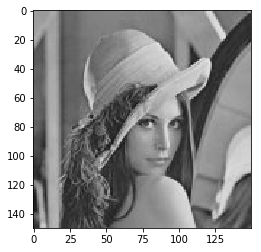

In [1]:
#濃淡ヒストグラム
import cv2
import numpy as np
from matplotlib import pyplot as plt

#カラー画像を解析する場合とグレー画像を解析する場合で分けるコードを組み込みたい。後で
def gray_histogram(imgpath):
    # 入力画像を読み込み
    img = cv2.imread(imgpath)    
    # グレースケール変換
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # NumPy
    #hist, bins = np.histogram(gray.ravel(),256,[0,256])
    # OpenCV
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    
    #return hist, bins
    return hist

def show_hist(hist):
    plt.xlim(0, 255)
    plt.plot(hist)
    plt.xlabel("Pixel value", fontsize=20)
    plt.ylabel("Number of pixels", fontsize=20)
    plt.grid()
    plt.show()

hist = gray_histogram('./images/Lenna.jpg')
print(type(hist))
img = cv2.imread('./images/Lenna.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap='gray',vmin = 0, vmax = 255)
plt.show()
    